L1/L2 регуляризация 
-----
1. У нас есть данные ввиде множества пар $X$ и $y$: $\{(x_1, y_1), (x_2, y_2), \ldots, (x_n, y_n)\}$
2. Мы хотим найти такую функцию $\hat{f}(x)$ которая бы минимизировала 
$$
MSE(\hat{f}, x) = \frac{1}{N} \sum_{i=1}^{N}\left(\ y_i - \hat{f}(x_i, \theta)\ \right) ^ 2 \rightarrow \text{min}_{\theta}
$$
3. Мы будем искать $\hat{f}(x)$ в предположении что это линейная функция:
$$
\hat{f}(x, \theta) = \theta_0 + x^{[1]}\theta_1 + x^{[2]}\theta_2 + \ldots + x^{[m]}\theta_m
$$

**Вопрос**:

Как запретить коэффициентам $\theta$ быть большими?

**Ответ**:

Возьмем и добавим их в оптимизируемую функцию, т.к. мы ищем минимиум этой функции то в процессе оптимизации 
они будут (по-крайней мере мы на это надеемся) уменьшаться:


$$
MSE_{l_1}(\hat{f}, x) = \frac{1}{N} \sum_{i=1}^{N}\left(\ y_i - \hat{f}(x_i, \theta)\ \right) ^ 2 + \alpha \sum_{j=1}^m |\theta_j| \rightarrow \text{min}
$$

$$
MSE_{l_2}(\hat{f}, x) = \frac{1}{N} \sum_{i=1}^{N}\left(\ y_i - \hat{f}(x_i, \theta)\ \right) ^ 2 + \alpha \sum_{j=1}^m \theta_j^2 \rightarrow \text{min}
$$


Обратите внимание что в сумме по тетта  индексация начинается с 1, а не с 0. Поскольку свободный коэффициент $\theta_0$ **нет смысла регуляризовывать** — если мы будем штрафовать за его величину, то получится, что мы учитываем некие априорные представления о близости целевой переменной к нулю и отсутствии необходимости в учёте её смещения. 

Коэффициент $\alpha$ называется **параметром регуляризации** и контролирует баланс
между подгонкой под обучающую выборку и штрафом за излишнюю сложность, этот параметр **подбирается на кросс-валидации**.


-----

-----

Обе модели реализованы в sklearn в модуле linear_models:

sklearn.linear_models.Lasso $\rightarrow l_1$

sklearn.linear_models.Ridge $\rightarrow l_2$

Давайте посмотрим как это выглядит на практике

In [51]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import Lasso, Ridge, SGDRegressor, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_regression

from sklearn.metrics import mean_squared_error as mse

In [52]:
params = {
    'n_samples':2000,
    'n_features':9,
    'n_informative':5,
    'bias':10,
    'noise':5,
    'coef':True, 
    'random_state': 51
}


X, y, _coef = make_regression(**params)


# Загляните внутрь функции make_regression, что означает каждый параметр?
# курсор внутрь круглых скобок и нажать shift+TAB

In [53]:
print('Истинные коэффициенты модели:\n', np.round(_coef, 3), )

Истинные коэффициенты модели:
 [67.246  0.    16.882 98.986  0.    15.995  0.     2.751  0.   ]


## 2.1 Lasso регуляризация

1. Создайте объект класса Lasso с параметрами:
    - `alpha=50`
    - `fit-intercept=True`
    - `random_state=33`
2. Обучите модель Лассо регресии на данных X: `model.fit(X, y)`
3. Предскажите с помощью этой модели значения целевой переменной: `model.predict(X)`
4. Посчитайте MSE между предсказанным и истинным значением.
5. Напечатайте веса обученной линейной модели. Что вы можете о них сказать?   
   
Ответ: некоторые признаки занулились по сравнению с моделью без регуляризации 
  
6. Используя параметр `alpha=15, 5, 2, 1, 0.3, 0.1, 0.03` обучите модель Lasso и посторойте зависимость **нормы** вектора весов $\theta$ от величины `alpha`. Прокомментируйте полученный результат    
  
Ответ: получилась линейная зависимость, чем больше альфа, тем меньше становятся веса, так как чем больше альфа, тем больше наказание за большие веса, то есть веса уменьшаются 

In [54]:
l1 = Lasso(alpha=50, fit_intercept=True, random_state=33)
l1.fit(X,y)
y_pred_l1 = l1.predict(X)
print("MSE Lasso:", mse(y, y_pred_l1))
print('Coefficients:', l1.coef_)

MSE Lasso: 5717.182944100362
Coefficients: [17.20788804  0.          0.         45.99958806 -0.          0.
  0.          0.         -0.        ]


In [55]:
alpha_arr = [15, 5, 2, 1, 0.3, 0.1, 0.03]
norm_1 = []
from numpy.linalg import norm

for i in alpha_arr:
    l1 = Lasso(alpha=i, fit_intercept=True, random_state=33)
    l1.fit(X,y)
    norm_1.append(norm(l1.coef_))

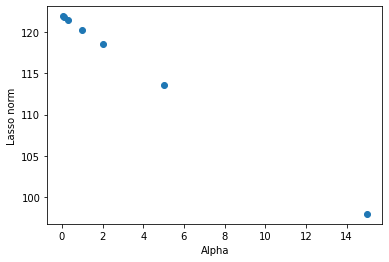

In [56]:
fig = plt.figure()
plt.scatter(alpha_arr, norm_1)
plt.xlabel('Alpha')
plt.ylabel('Lasso norm');

## 2.2 Ridge регуляризация

1. Тоже но для Ridge регрессии
2. Прокомментируйте различия между Ridge и Lasso  
Ответ: различия в MSE(у Ridge намного меньше), кроме того норма вектора весов у Ridge при изменении альфа меняется очень незначительно

In [57]:
l2 = Ridge(alpha=50, fit_intercept=True, random_state=33)
l2.fit(X,y)
y_pred_l2 = l2.predict(X)
print("MSE Lasso:", mse(y, y_pred_l2))
print('Coefficients:', l2.coef_)

MSE Lasso: 33.41231735676434
Coefficients: [ 6.56410616e+01  3.73049473e-03  1.63373730e+01  9.64430338e+01
 -1.92573293e-01  1.55601747e+01  3.45338984e-02  2.83875351e+00
  1.51798607e-01]


In [58]:
norm_2 = []

for i in alpha_arr:
    l2 = Ridge(alpha=i, fit_intercept=True, random_state=33)
    l2.fit(X,y)
    norm_2.append(norm(l2.coef_))

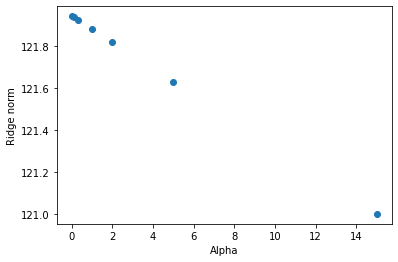

In [59]:
fig = plt.figure()
plt.scatter(alpha_arr, norm_2)
plt.xlabel('Alpha')
plt.ylabel('Ridge norm');

## 2.3 Давайте посмотрим что происходит с весами модели, в процессе обучения градиентным спуском Лассо регрессии

1. Попробуйте уменьшить значение параметра (например 0.01, 0.003, 0.0001) `eta0` отвечающего за learning rate, как изменились графики изменения коэффициентов линейной модели во время обучения? 
   
Ответ: при очень мелком learning rate можем видеть что коэффициенты линейной модели изменяются очень плавно,пока не выходят на плато в отличие от того, как было при больших learning rate, где скачкообразно меняются коэффициенты, но также выходят на плато(стоит заметить, что это происходит немного быстрее( за меньшее число итераций), так как шаг больше)  
  
2. Следует ли регуляризовывать свободный член регресси (intercept), почему?  
  
Ответ: нет, так как если мы будем штрафовать за его величину, то получится, что мы учитываем некие априорные представления о близости целевой переменной к нулю и отсутствии необходимости в учёте её смещения.

In [60]:
import warnings
warnings.filterwarnings('ignore')

In [61]:
sgd_params = {
    'loss':'squared_error',
    'penalty':'l1',
    'alpha':.1,
    'l1_ratio':1,
    'fit_intercept':True,
    'max_iter':None, 
    'shuffle':True,
    'random_state':76,
    'eta0' : 0.05,
    'learning_rate':'constant',
}

In [62]:
coef = []
intercept = []
for m_iter in range(1, 20, 1):
    
    sgd_params['max_iter'] = m_iter
    model = SGDRegressor(**sgd_params)
    model.fit(X, y)
    
    coef.append(model.coef_)
    intercept.append(model.intercept_)
    
coef = np.array(coef)
intercept = np.array(intercept)
print(model.coef_, model.intercept_)

[66.41639425  0.         15.41232901 98.47611706  0.         15.94692213
  0.          2.63564488  0.        ] [11.19759851]


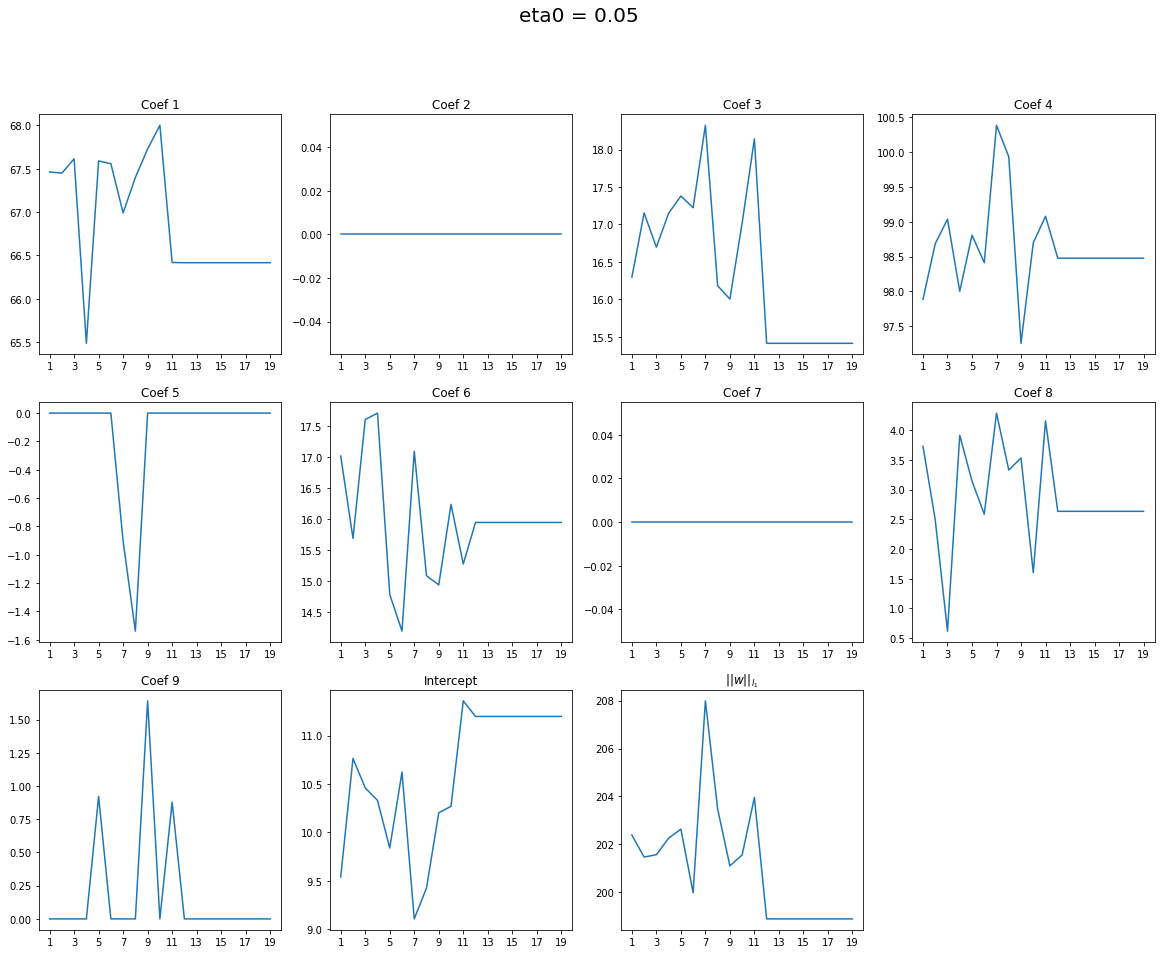

In [63]:
fig = plt.figure(figsize=(20,15))
for n in range(1, 10):
    ax = plt.subplot(int('34{}'.format(n)))
    ax.plot(list(range(1, 20, 1)), coef[:, n-1])
    ax.set_xticks(range(1, 20, 2))
    ax.set_title(f'Coef {n}')
    
ax = plt.subplot(3,4,10)
ax.plot(list(range(1, 20, 1)), intercept)
ax.set_xticks(range(1, 20, 2))
ax.set_title(f'Intercept')

ax = plt.subplot(3,4,11)
ax.plot(list(range(1, 20, 1)), np.abs(coef).sum(axis=1))
ax.set_xticks(range(1, 20, 2))
ax.set_title('$||w||_{l_1}$')
fig.suptitle('eta0 = 0.05', fontsize = 20);

[67.1666866   0.         16.62509121 98.38614161  0.         15.65749375
  0.          3.29049518  0.51905341] [10.42359271]
[67.37185688  0.         16.70613203 98.7061375  -0.21428475 15.97976468
  0.          2.88239783  0.        ] [10.18423729]
[ 6.56377050e+01  0.00000000e+00  1.60460361e+01  9.62167293e+01
 -1.51132520e-01  1.55868982e+01  3.57815198e-04  2.70001567e+00
  5.10879832e-02] [9.84247812]


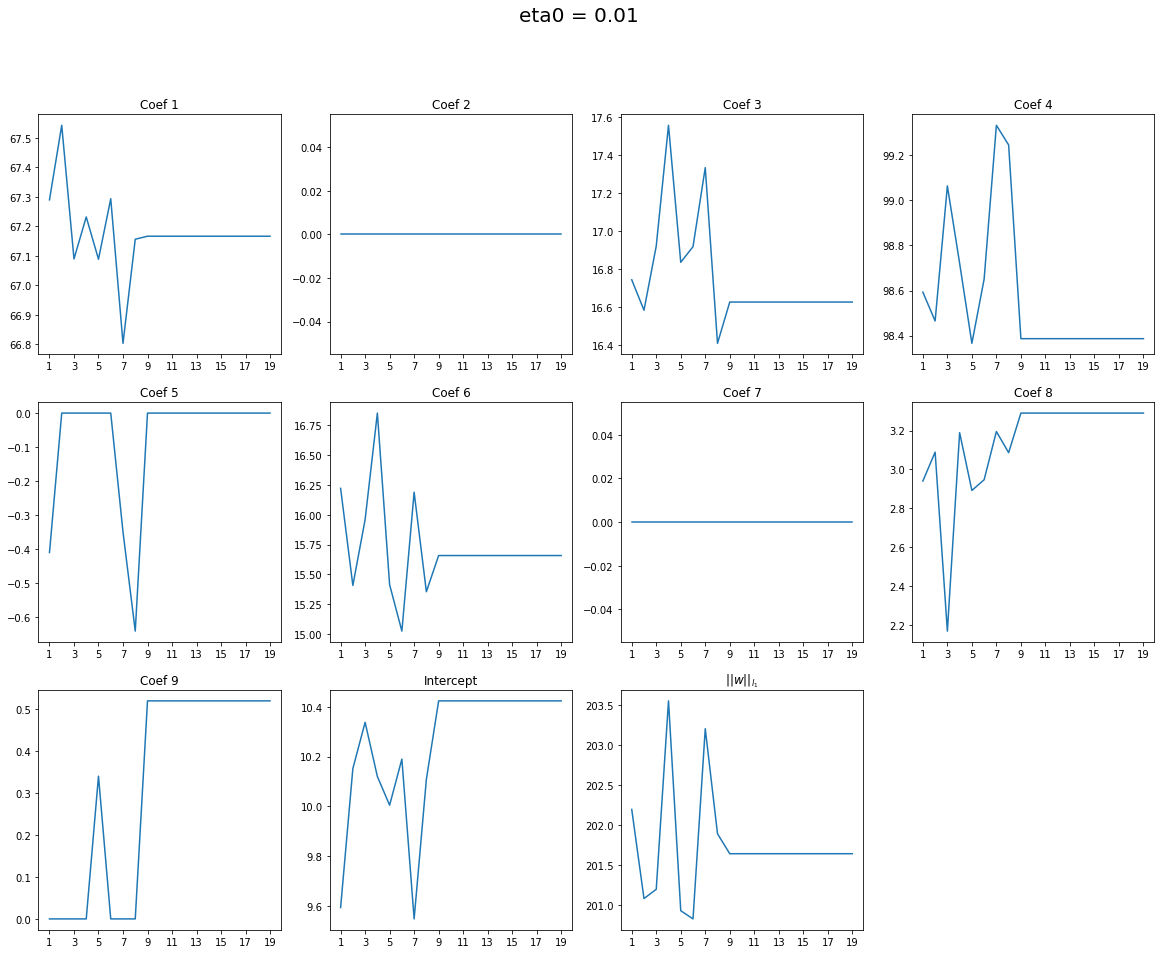

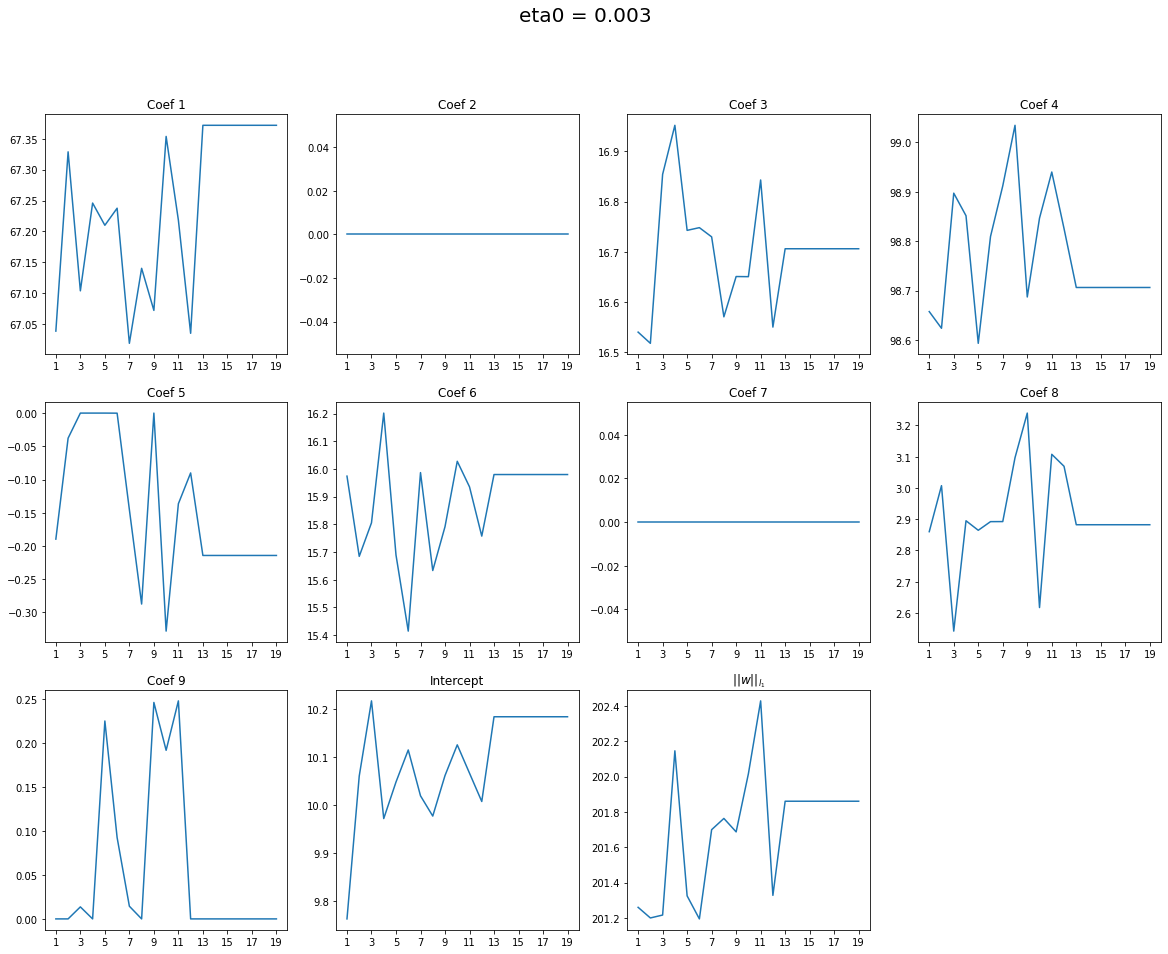

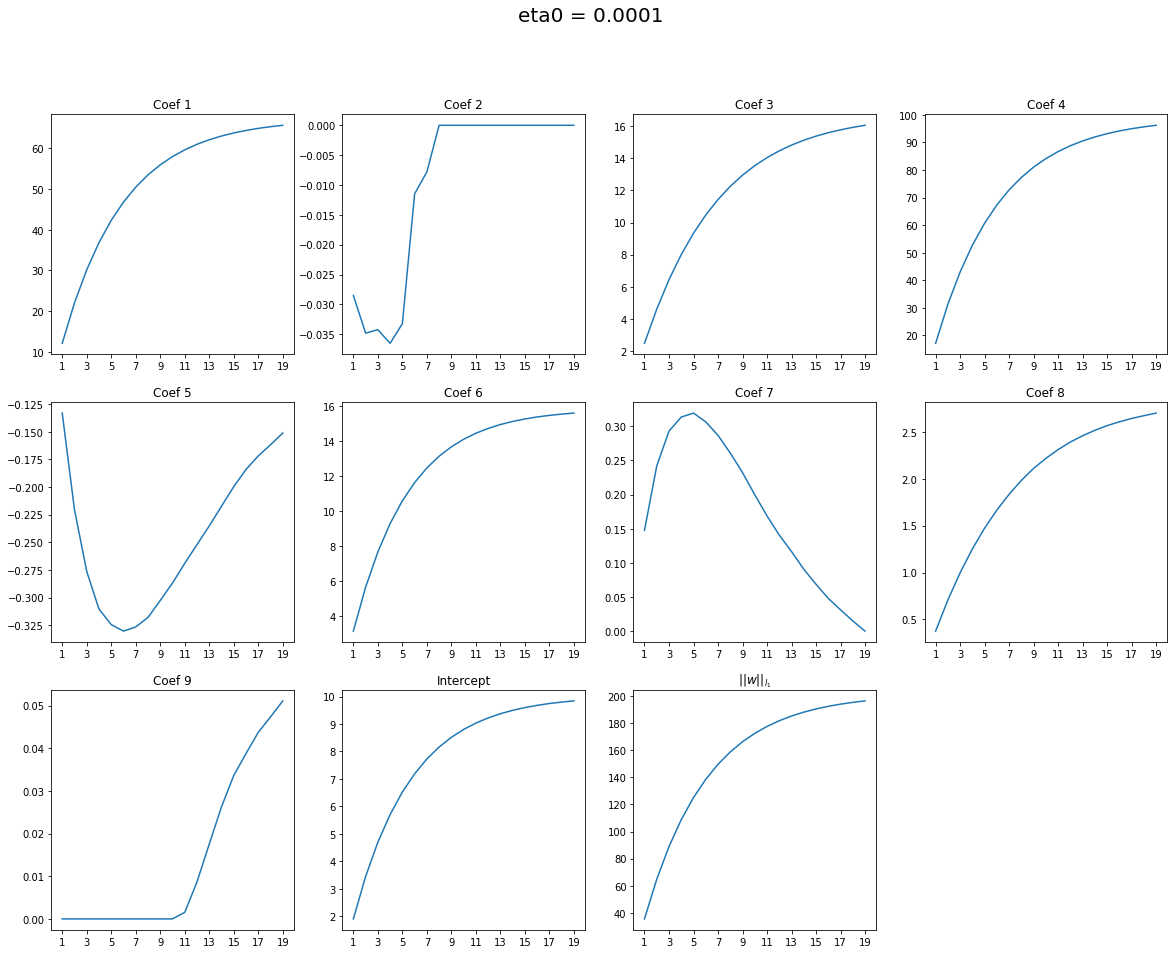

In [64]:
eta0 = [0.01, 0.003, 0.0001]

for i in eta0:
    sgd_params['eta0'] = i
    coef = []
    intercept = []
    for m_iter in range(1, 20, 1):
        
        sgd_params['max_iter'] = m_iter
        model = SGDRegressor(**sgd_params)
        model.fit(X, y)
        
        coef.append(model.coef_)
        intercept.append(model.intercept_)
        
    coef = np.array(coef)
    intercept = np.array(intercept)
    print(model.coef_, model.intercept_)
    
    fig = plt.figure(figsize=(20,15))
    for n in range(1, 10):
        ax = plt.subplot(int('34{}'.format(n)))
        ax.plot(list(range(1, 20, 1)), coef[:, n-1])
        ax.set_xticks(range(1, 20, 2))
        ax.set_title(f'Coef {n}')
        
    ax = plt.subplot(3,4,10)
    ax.plot(list(range(1, 20, 1)), intercept)
    ax.set_xticks(range(1, 20, 2))
    ax.set_title(f'Intercept')

    ax = plt.subplot(3,4,11)
    ax.plot(list(range(1, 20, 1)), np.abs(coef).sum(axis=1))
    ax.set_xticks(range(1, 20, 2))
    ax.set_title('$||w||_{l_1}$')
    
    fig.suptitle(f'eta0 = {i}', fontsize = 20)

# 3. "Предсказание" числа в другой системе исчисления

Построим линейную модель которая переводит числа из *двоичной* системы исчисления в *десятичную*. Для этого сгенерируйте тренировочную выборку размера 10000 наблюдений, в которой в качестве признаков выступают бинарные векторы длины 32, а в качестве `y` значение в десятичной системе исчисления. Например:

- $x_1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]$, $y_1 = 0$
- $x_2 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0]$, $y_2 = 525856$
- $x_2 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]$, $y_3 = 3$


1. Обучите 3 линейные модели на **всех наблюдениях**: Линейная регрессия, Лассо регрессия, Гребневая регрессия (для всех моделей устновите параметр `fit_intercept=False`, что контролирует этот параметр?).  
  
  Ответ: контролирует смещение, то есть если будет False, то данные отцентрированы  
    
    
2. Сравните ошибку, например MSE для всех трех моделей.  
  
  Ответ: значительно наименьшая ошибка у Линейной регрессии  
  
3. Сравните коэффиценты обученных моделей, что вы можете о них сказать?  
  
  Ответ: коэффициенты везде примерно одинаковые, однако можно заметить, что в Ridge и Linear Regression коэффициенты только положительные   
    
    
4. Разделите ваши данные на тренировочную и тестовую выборки, обучите модели на тренировочной части данных, сделайте предсказание на тестовой. Сравните коэффициенты обученных моделей, сравните качество (в терминах MSE) на тестовой и тренировочной выборках.  
  
  Ответ: в Lasso и Ridge страдает качество, на ~20 порядков меньше MSE без регуляризации. 
  Кроме того, удивительно, что качество на тестовой выборке во всех случаях лучше чем на тренировочной  
     
5. **Прокомментируйте полученные результаты**  
  
  Ответ: Не всегда регуляризация необходима, как мы видим, в задаче предсказания числа в другой системе исчисления регуляризация только ухудшает качество 


In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import random

In [66]:
y = []
X = []
for i in range(10000):
    number = random.randint(0, 4294967295)
    y.append(number)
    binary = list(np.binary_repr(number))
    x_list = [int(l) for l in binary]
    X.append(np.pad(x_list, (32-len(x_list), 0),'constant', constant_values=0))

In [67]:
mse_all = np.zeros(3)
mse_train = np.zeros(3)
mse_test = np.zeros(3)

In [68]:
model = LinearRegression(fit_intercept=False)

ml = model.fit(X, y)
y_pred = ml.predict(X)
mse_all[0] = mse(y, y_pred)
print("MSE LR:", mse(y, y_pred))
print("Coefficients:", ml.coef_)

MSE LR: 1.5335665309938437e-11
Coefficients: [2.14748365e+09 1.07374182e+09 5.36870912e+08 2.68435456e+08
 1.34217728e+08 6.71088640e+07 3.35544320e+07 1.67772160e+07
 8.38860800e+06 4.19430400e+06 2.09715200e+06 1.04857600e+06
 5.24288000e+05 2.62144000e+05 1.31072000e+05 6.55360000e+04
 3.27680000e+04 1.63840000e+04 8.19200000e+03 4.09600000e+03
 2.04800000e+03 1.02400000e+03 5.12000000e+02 2.56000000e+02
 1.27999999e+02 6.40000001e+01 3.20000001e+01 1.59999985e+01
 8.00000024e+00 4.00000027e+00 1.99999967e+00 1.00000039e+00]


In [69]:
model_l1 = Lasso(alpha=5, fit_intercept=False)

ml_l1 = model_l1.fit(X, y)
y_pred_m_l1 = ml_l1.predict(X)
mse_all[1] = mse(y, y_pred_m_l1)
print("MSE L1:", mse(y, y_pred_m_l1))
print("Coefficients:", ml_l1.coef_)

MSE L1: 4543139245306.456
Coefficients: [ 2.14850130e+09  1.07485432e+09  5.37899142e+08  2.69450521e+08
  1.35186679e+08  6.79984372e+07  3.43033453e+07  1.73780001e+07
  8.74240062e+06  4.46055479e+06  2.19883039e+06  8.99068047e+05
  9.19466546e+04 -2.88703034e+05 -6.03920184e+05 -8.69433373e+05
 -9.20254028e+05 -1.02853128e+06 -1.07339043e+06 -1.05992304e+06
 -1.02855640e+06 -8.34497333e+05 -8.14370434e+05 -7.10001336e+05
 -4.65565704e+05 -3.46559849e+05 -9.40769033e+04  1.55430545e+05
  3.32522814e+05  4.85163795e+05  6.07024133e+05  7.57214658e+05]


In [70]:
model_l2 = Ridge(alpha=5, fit_intercept=False)

ml_l2 = model_l2.fit(X, y)
y_pred_m_l2 = ml_l2.predict(X)
mse_all[2] = mse(y, y_pred_m_l2)
print("MSE L1:", mse(y, y_pred_m_l2))
print("Coefficients:", ml_l2.coef_)

MSE L1: 5636201571442.245
Coefficients: [2.14341326e+09 1.07179968e+09 5.36095240e+08 2.68169624e+08
 1.34159931e+08 6.72966175e+07 3.37510461e+07 1.69669537e+07
 8.66417305e+06 4.45049494e+06 2.32102449e+06 1.34222069e+06
 7.48067082e+05 5.23009614e+05 4.07514773e+05 3.79796535e+05
 2.81116386e+05 3.39826535e+05 2.78150323e+05 3.18396012e+05
 3.01210683e+05 1.80057644e+05 2.30111315e+05 2.65721069e+05
 2.29164155e+05 2.92935459e+05 2.19888630e+05 1.97946728e+05
 2.82433264e+05 2.66062401e+05 2.63034806e+05 2.87259864e+05]


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=5)

In [72]:
ml = model.fit(X_train, y_train)
y_pred = ml.predict(X_test)
y_pred_train = ml.predict(X_train)

mse_train[0] = mse(y_train, y_pred_train)
mse_test[0] = mse(y_test, y_pred)
print("MSE LR test:", mse(y_test, y_pred))
print("MSE LR train:", mse(y_train, y_pred_train))
print("Coefficients:", ml.coef_)

MSE LR test: 5.967624055865673e-12
MSE LR train: 5.8841173018939046e-12
Coefficients: [2.14748365e+09 1.07374182e+09 5.36870912e+08 2.68435456e+08
 1.34217728e+08 6.71088640e+07 3.35544320e+07 1.67772160e+07
 8.38860800e+06 4.19430400e+06 2.09715200e+06 1.04857600e+06
 5.24288000e+05 2.62144000e+05 1.31072000e+05 6.55360000e+04
 3.27680000e+04 1.63840000e+04 8.19200000e+03 4.09600000e+03
 2.04800000e+03 1.02400000e+03 5.12000000e+02 2.56000000e+02
 1.27999999e+02 6.40000009e+01 3.20000001e+01 1.59999990e+01
 7.99999988e+00 4.00000039e+00 1.99999982e+00 1.00000024e+00]


In [73]:
ml_l1 = model_l1.fit(X_train, y_train)
y_pred_l1 = ml_l1.predict(X_test)
y_pred_train_l1 = ml_l1.predict(X_train)

mse_train[1] = mse(y_train, y_pred_train_l1)
mse_test[1] = mse(y_test, y_pred_l1)
print("MSE LR test:", mse(y_test, y_pred_l1))
print("MSE LR train:", mse(y_train, y_pred_train_l1))
print("Coefficients:", ml_l1.coef_)

MSE LR test: 4958432556537.428
MSE LR train: 4764122864128.678
Coefficients: [ 2.14854396e+09  1.07487464e+09  5.37980633e+08  2.69501780e+08
  1.35227011e+08  6.80413489e+07  3.43286954e+07  1.74481367e+07
  8.81412630e+06  4.56607133e+06  2.27705965e+06  9.73716350e+05
  1.23804967e+05 -3.24021373e+05 -5.99387820e+05 -8.94422475e+05
 -9.40525178e+05 -1.05670277e+06 -1.04836177e+06 -1.08785205e+06
 -1.05368941e+06 -8.97546877e+05 -8.17322257e+05 -8.14640109e+05
 -4.98021774e+05 -4.05065354e+05 -1.71148785e+05  1.24455056e+05
  2.53357308e+05  4.59012049e+05  5.68469406e+05  6.64988104e+05]


In [74]:
ml_l2 = model_l2.fit(X_train, y_train)
y_pred_l2 = ml_l2.predict(X_test)
y_pred_train_l2 = ml_l2.predict(X_train)

mse_train[2] = mse(y_train, y_pred_train_l2)
mse_test[2] = mse(y_test, y_pred_l2)
print("MSE LR test:", mse(y_test, y_pred_l2))
print("MSE LR train:", mse(y_train, y_pred_train_l2))
print("Coefficients:", ml_l2.coef_)

MSE LR test: 12118728445263.385
MSE LR train: 11613227954540.709
Coefficients: [2.14161577e+09 1.07095524e+09 5.35690346e+08 2.68062857e+08
 1.34109975e+08 6.73492032e+07 3.38026679e+07 1.70604157e+07
 8.77339969e+06 4.54939578e+06 2.41749855e+06 1.42335384e+06
 8.29195022e+05 6.68203589e+05 5.09310630e+05 5.33793496e+05
 4.72205858e+05 5.15294090e+05 3.57164476e+05 4.29838094e+05
 3.78248750e+05 3.46491922e+05 3.58190700e+05 4.79195932e+05
 3.22871882e+05 3.93968988e+05 2.72743862e+05 2.91065496e+05
 4.47714916e+05 3.89228050e+05 4.16910018e+05 5.18144677e+05]


In [75]:
import pandas as pd

pd.DataFrame([mse_all,mse_train, mse_test], columns=['LR', 'Lasso', 'Ridge'], index=['mse_all', 'mse_train', 'mse_test'])

,LR,Lasso,Ridge
mse_all,1.533567e-11,4.543139e+12,5.636202e+12
mse_train,5.884117e-12,4.764123e+12,1.161323e+13
mse_test,5.967624e-12,4.958433e+12,1.211873e+13




jupyter notebook c вашим решением необходимо отправить на почту kurmukovai@gmail.com, с темой письма [iitp-intro-ds-2024-ha3-Surname], например [iitp-intro-ds-2024-ha3-Kurmukov] до 11:59:59 МСК 22.02.2024.

- Назовите ваш нотбук так же как и тему письма
- Ваш нотбук должен исполняться по Kernel -> Restart & Run all без падений и ошибок